In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math
import copy

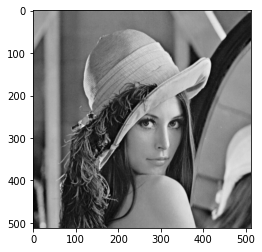

In [2]:
gray_image=cv.imread('lenna.png',0)
plt.imshow(gray_image,cmap='gray')

In [26]:
def custom_laplace(fft):
    temp=copy.copy(fft)
    center=(round(temp.shape[0]/2),round(temp.shape[1]/2))
    for u, rows in enumerate(temp):
        for v, cols in enumerate(rows):
            dist_square=math.pow(u-center[0],2)+math.pow(v-center[1],2)
            h=(-4)*math.pow(math.pi,2)*dist_square
            temp[u,v]=temp[u,v]*h
    return temp

C:\Users\david\AppData\Local\Temp\ipykernel_7216\1911202648.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(fft_1)),cmap='gray')


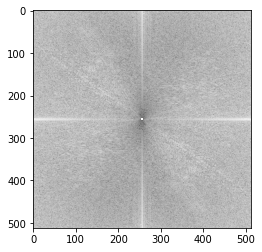

In [27]:
fft=np.fft.fftshift(np.fft.fft2(gray_image))
# Gaussian filter
fft_1=custom_laplace(fft)
# fft_2=custom_laplace(fft)
# fft_3=custom_laplace(fft)
plt.imshow(np.log(abs(fft_1)),cmap='gray')

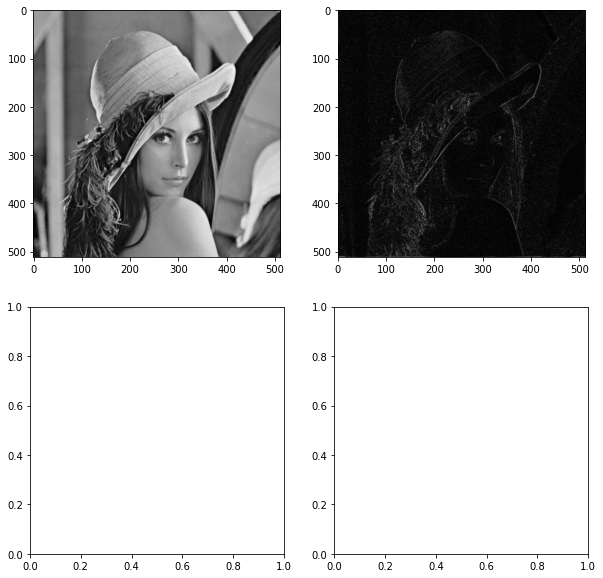

In [28]:
ifft_1=np.fft.ifft2(fft_1)
# ifft_2=np.fft.ifft2(fft_2)
# ifft_3=np.fft.ifft2(fft_3)

fig,ax=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1),cmap='gray')
# plt.subplot(2,2,3)
# plt.imshow(abs(ifft_2),cmap='gray')
# plt.subplot(2,2,4)
# plt.imshow(abs(ifft_3),cmap='gray')

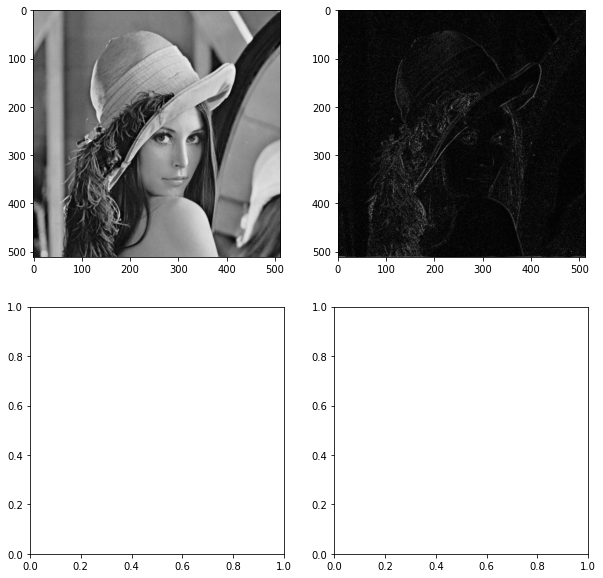

In [29]:
# sharpen the original image by adding the filtered image
fig2,ax2=plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(abs(ifft_1)+gray_image,cmap='gray')
# plt.subplot(2,2,3)
# plt.imshow(abs(ifft_2)+gray_image,cmap='gray')
# plt.subplot(2,2,4)
# plt.imshow(abs(ifft_3)+gray_image,cmap='gray')